## Challenge Exercise 3 (CE3)

### Due on 9/16/25 @ 11:55 pm EST (see Canvas Assignment)

****

## Collaboration policy

This is a group assignment. The maximum number of students per group is four. There are no existing group assignments. However, **all group members must be different from those in CE1 and CE2** (i.e., there is no overlap with a previous group).

Please be welcoming and kind, and invite students you may not know well (i.e., be a good classmate). If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.

### Team members

1. put fullname
2. put fullname
3. put fullname
4. put fullname

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. Onyen and PID
2. Onyen and PID
3. Onyen and PID
4. Onyen and PID

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

## Numerical interpolation.

The data points in matrix $P$ form the 2D curve shown below. Specifically, $P$ is a $21x2$ matrix where each row $i$ represents a point $P_i(x_i, y_i)$ in a Cartesian coordinate system (see the blue-colored points). This data will be used to numerically estimate linearly interpolated points, cubic spline interpolated points, and the cubic spline interpolation mean absolute error (MAE).

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The data representation slides (see Canvas schedule) may be helpful.
- The performance evaluation slides (see Canvas schedule) may be helpful.


In [2]:
P = np.loadtxt("P.csv", delimiter=",")
[m,n]=P.shape
print( "P is {} x {} dimension matrix".format( m, n ) )

P is 21 x 2 dimension matrix


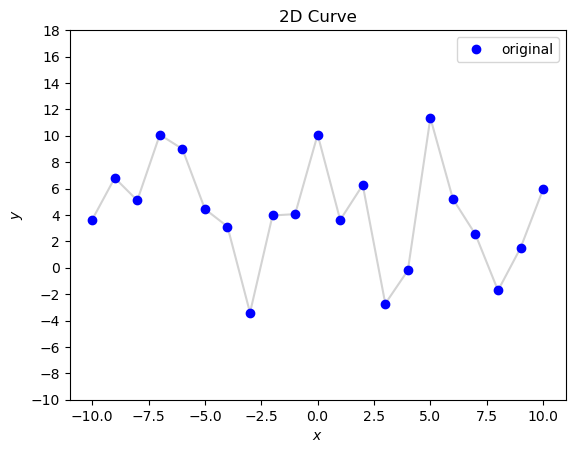

In [3]:
plt.plot( P[:,0], P[:,1], "lightgrey", label="_Hidden Plot" )
plt.plot( P[:,0], P[:,1], "bo", label="original")
plt.yticks( np.arange(-10, 20, step=2.0) )
plt.title("2D Curve")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

****

<img src="p1.png" width="450" style="float: right"/>

**P1** (10 Points). In the coding cell below, write a small program that performs piecewise linear interpolation. Specifically, for each pair of points (blue color) forming a straight line, your solution will numerically estimate **four** evenly spaced points (red color) along the line. To receive full credit, your solution must generate a plot identical to the one provided.

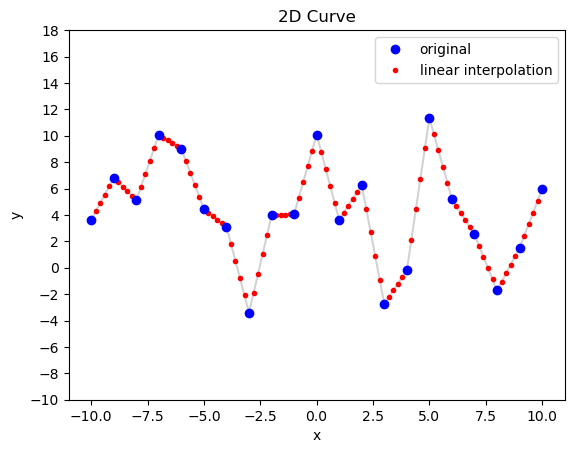

In [15]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

x, y = P[:,0], P[:,1]
Lx, yL = [], []

for i in range(len(x)-1):
    xi = np.linspace(x[i], x[i+1], 6)
    yi = np.linspace(y[i], y[i+1], 6)
    plt.plot(xi, yi, "-", color="lightgrey", zorder=1)
    plt.plot(xi[1:-1], yi[1:-1], "ro", markersize=3,
             label="linear interpolation" if i==0 else None, zorder=2)
    Lx.extend(xi[1:-1]); yL.extend(yi[1:-1])

orig, = plt.plot(x, y, "bo", label="original", zorder=3)
h,l = plt.gca().get_legend_handles_labels()
order = [l.index("original"), l.index("linear interpolation")]
plt.legend([h[i] for i in order], [l[i] for i in order])
plt.title("2D Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.yticks(np.arange(-10,20,2.0))
plt.show()

Lx, yL = np.array(Lx), np.array(yL)


****

<img src="p2.png" width="450" style="float: right"/>

**P2** (10 Points). In the coding cell below, write a small program that performs cubic spline interpolation. Specifically, for each pair of points (blue color) forming a smooth curve, your solution will numerically estimate **four** evenly spaced points (red color) along the curve. To receive full credit, your solution must create a plot identical to the provided one.

<ins>Note(s)</ins>: You may use a <a href="https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm">tridiagonal matrix solver</a> with the Thomas algorithm. However, **you must write your own solver code** (i.e., a coding solution that is not yours cannot be copied from the web or generated by AI). **Hint**: Consider whether it is necessary before proceeding.

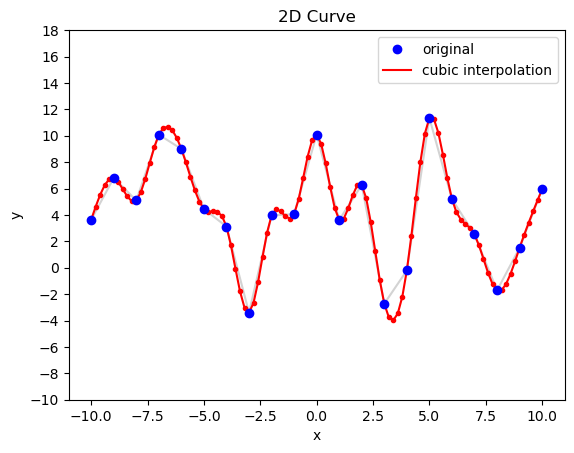

In [16]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

x, y = P[:,0].astype(float), P[:,1].astype(float)
n = len(x); h = np.diff(x)
a = np.zeros(n); b = np.zeros(n); c = np.zeros(n); d = np.zeros(n)
b[0] = b[-1] = 1.0
for i in range(1, n-1):
    a[i] = h[i-1]; b[i] = 2*(h[i-1]+h[i]); c[i] = h[i]
    d[i] = 6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])

def thomas(a,b,c,d):
    a,b,c,d = a.copy(), b.copy(), c.copy(), d.copy()
    for i in range(1,len(b)):
        w = a[i]/b[i-1]; b[i] -= w*c[i-1]; d[i] -= w*d[i-1]
    x = np.zeros_like(d); x[-1] = d[-1]/b[-1]
    for i in range(len(b)-2,-1,-1):
        x[i] = (d[i] - c[i]*x[i+1]) / b[i]
    return x

M = thomas(a,b,c,d)

Sx, yS = [], []
plt.plot(x, y, "-", color="lightgrey", zorder=1)
for i in range(n-1):
    xi = np.linspace(x[i], x[i+1], 6); hi = h[i]
    t = (x[i+1]-xi)/hi; s = (xi-x[i])/hi
    yi = (M[i]*(t**3)*hi**2/6 + M[i+1]*(s**3)*hi**2/6
          + (y[i]-M[i]*hi**2/6)*t + (y[i+1]-M[i+1]*hi**2/6)*s)
    plt.plot(xi, yi, "r-", label="cubic interpolation" if i==0 else None, zorder=2)
    plt.plot(xi[1:-1], yi[1:-1], "ro", markersize=3, zorder=3)
    Sx.extend(xi[1:-1])
    yS.extend(yi[1:-1])

orig, = plt.plot(x, y, "bo", label="original", zorder=4)
h,l = plt.gca().get_legend_handles_labels()
order = [l.index("original"), l.index("cubic interpolation")]
plt.legend([h[i] for i in order], [l[i] for i in order])
plt.title("2D Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.yticks(np.arange(-10,20,2.0))
plt.show()

Sx, yS = np.array(Sx), np.array(yS)

****

**P3** (5 Points). In the coding cell below, write a small program that estimates the cubic spline interpolation MAE numerically and prints the value with **three decimal places**. 

Specifically, 

$$\textnormal{MAE} = \frac{1}{n} \sum_{i=1}^{n}\left | L_i(t)-S_i\right |,$$

where, given $x_i$, the linearly interpolated point is $L_i(t)$ and the cubic spline interpolated point is $S_i$. 

To receive full credit, your MAE must be $0.420 \pm 0.050$.

<ins>Hint</ins>: Use your interpolation solutions in P1 and P2 to calculate the MAE value.

In [ ]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

# There are 80 red points in total interpolations, plus 21 blue original endpoints
# A scale factor is needed to include the impact of those endpoints (the original blue points), 
# no adjustment needed for the nominator since L-S = 0 for endpoints
mae = np.mean(np.abs(yL - yS)) * 80/101 
print(f"MAE = {mae:.3f}")

MAE = 0.418
